In [52]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

In [24]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
btc = pd.read_csv('./Cryptocurrencies/BTC.csv')
eth = pd.read_csv('./Cryptocurrencies/ETH.csv')
doge = pd.read_csv('./Cryptocurrencies/DOGE.csv')

In [13]:
# data1 = pd.read_csv('EUR_USD Historical Data.csv')
# data1.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [25]:
btc = btc.loc[:, ['Date', 'Close']]
btc['Date'] = pd.to_datetime(btc.Date)

eth = eth.loc[:, ['Date', 'Close']]
eth['Date'] = pd.to_datetime(eth.Date)

doge = doge.loc[:, ['Date', 'Close']]
doge['Date'] = pd.to_datetime(doge.Date)

In [27]:
# Tỉ lệ pha train, test
train_ratio = 0.8
test_ratio = 1.0 - train_ratio

In [28]:
# Split the data into training, testing, and validation sets
# BTC
train_size = int(train_ratio * len(btc))
test_size = int(test_ratio * len(btc))
btc_train_data = btc[:train_size]
btc_test_data = btc[train_size:train_size+test_size]

# ETH
train_size = int(train_ratio * len(eth))
test_size = int(test_ratio * len(eth))
eth_train_data = eth[:train_size]
eth_test_data = eth[train_size:train_size+test_size]

# DOGE
train_size = int(train_ratio * len(doge))
test_size = int(test_ratio * len(doge))
doge_train_data = doge[:train_size]
doge_test_data = doge[train_size:train_size+test_size]

In [1]:
!pip install pmdarima

In [29]:
# 3. Quá trình Training
btc_x_train = np.array(btc_train_data.index).reshape(-1, 1)
btc_y_train = np.array(btc_train_data['Close'])

eth_x_train = np.array(eth_train_data.index).reshape(-1, 1)
eth_y_train = np.array(eth_train_data['Close'])

doge_x_train = np.array(doge_train_data.index).reshape(-1, 1)
doge_y_train = np.array(doge_train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
btc_model = auto_arima(btc_y_train, trace=True, error_action='ignore', suppress_warnings=True)
eth_model = auto_arima(eth_y_train, trace=True, error_action='ignore', suppress_warnings=True)
doge_model = auto_arima(doge_y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
btc_model.fit(btc_y_train)
eth_model.fit(eth_y_train)
doge_model.fit(doge_y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26785.347, Time=2.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26790.475, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26791.463, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26791.472, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26788.762, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26795.024, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26795.462, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26787.323, Time=2.58 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26787.383, Time=3.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26793.466, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26795.403, Time=0.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26795.590, Time=0.52 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26789.335, Time=2.76 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=26794.030, Time=0.55 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

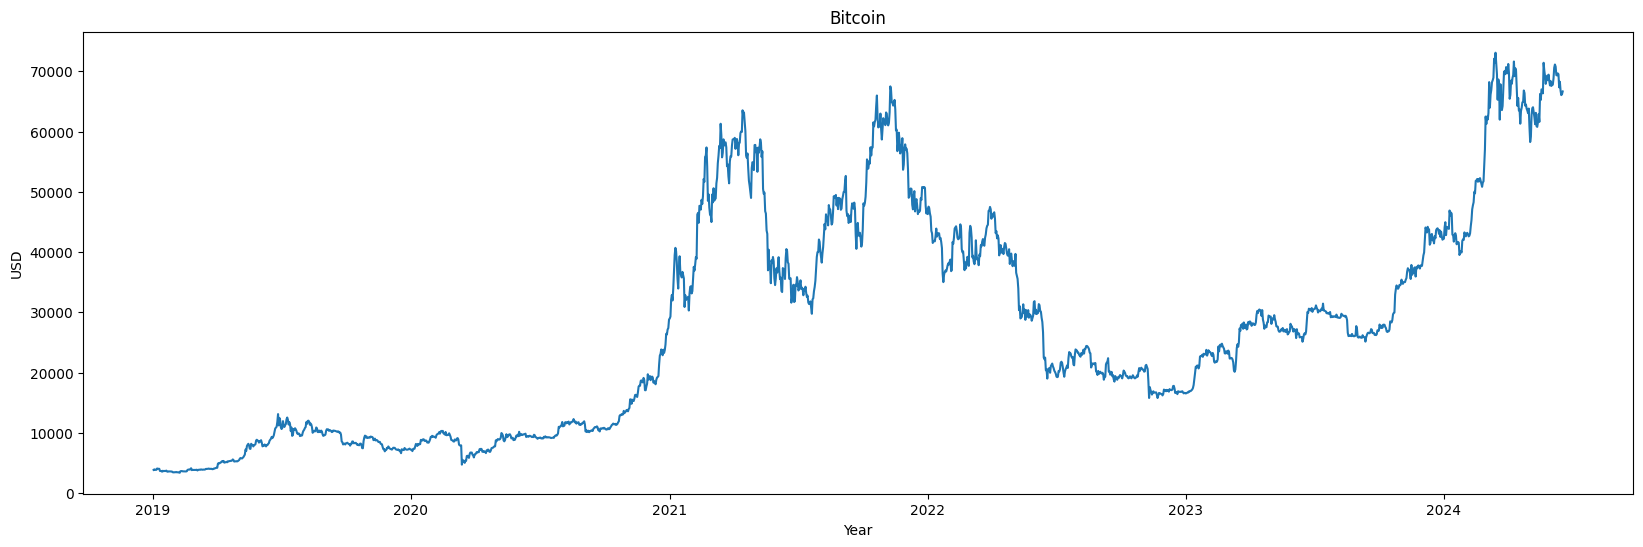

In [18]:
datetimes = np.array(data1['Date'])
plt.figure(figsize=(20, 6))
plt.title('Bitcoin')
plt.plot(datetimes, data1['Close'])
plt.xlabel('Year')
plt.ylabel('USD')
plt.show()

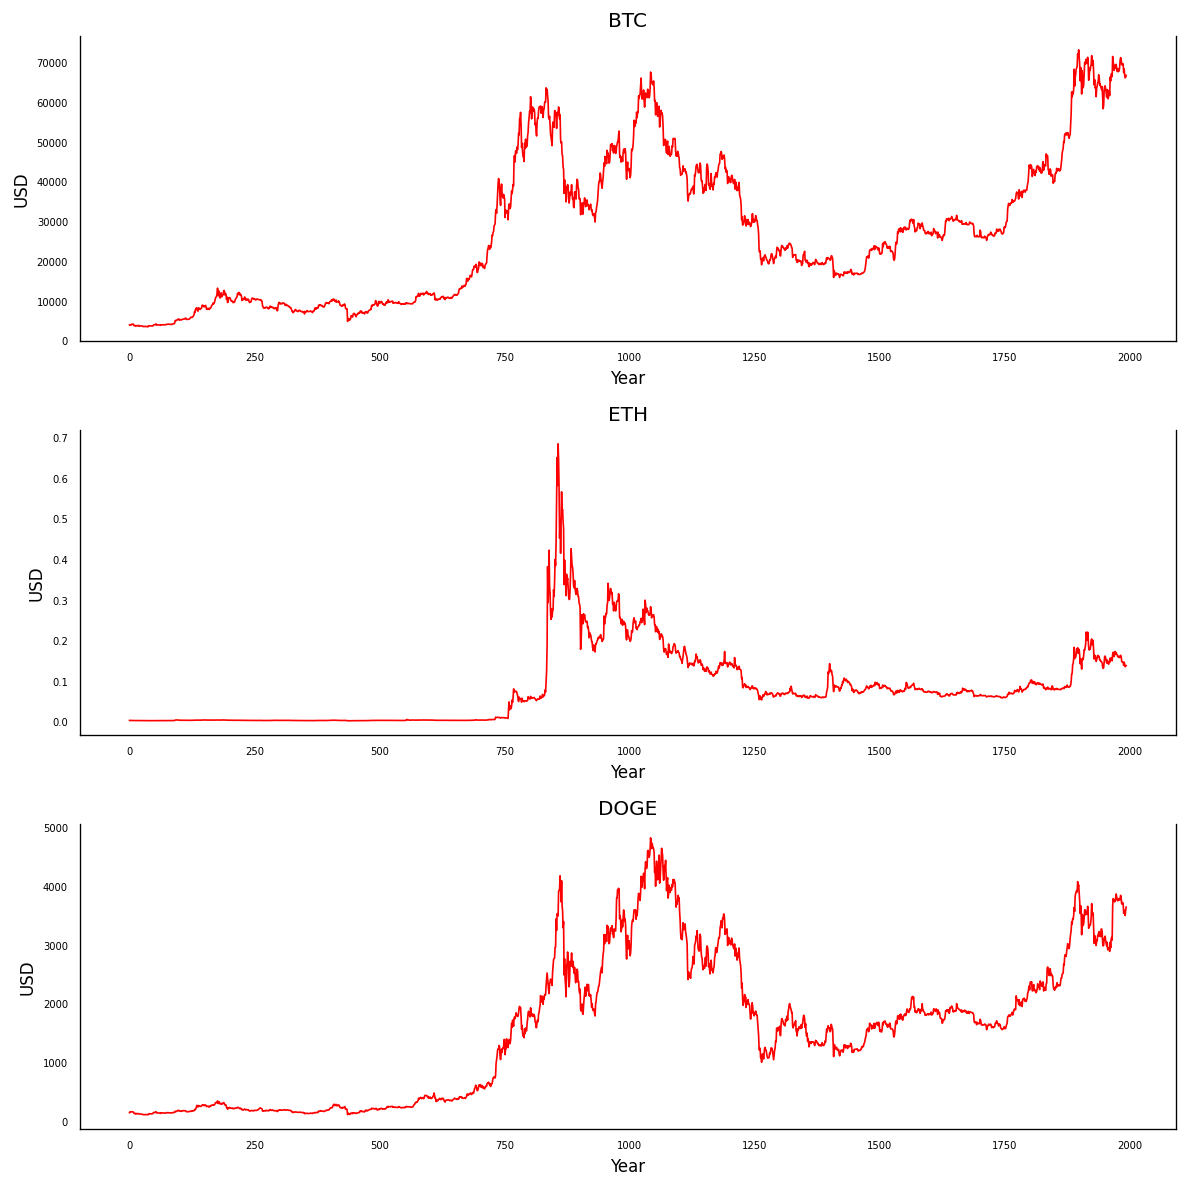

In [35]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,10))

df_list = ['btc', 'eth', 'doge']
coins = ['BTC', 'ETH', 'DOGE']

for i, ax in enumerate(axes.flatten()):
    data = eval(df_list[i])['Close']  # Use iloc for column access, should be fast
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(coins[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('USD')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

    # Formats
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

In [36]:
# 4. Quá trình testing 
# BTC
btc_x_test = np.array(btc_test_data.index).reshape(-1, 1)
btc_y_test = np.array(btc_test_data['Close'])
btc_y_pred = btc_model.predict(n_periods=len(btc_y_test))

# ETH
eth_x_test = np.array(eth_test_data.index).reshape(-1, 1)
eth_y_test = np.array(eth_test_data['Close'])
eth_y_pred = eth_model.predict(n_periods=len(eth_y_test))

# DOGE
doge_x_test = np.array(doge_test_data.index).reshape(-1, 1)
doge_y_test = np.array(doge_test_data['Close'])
doge_y_pred = doge_model.predict(n_periods=len(doge_y_test))

In [60]:
# 5. Quá trình tạo index predict 30, 60 và 90 ngày tiếp theo
i = 0

for df in df_list:
    days = [30, 60, 90]

    for d in days:
        last_index = eval(df).index[-1]
        last_data = pd.RangeIndex(
            start=last_index, stop=last_index+d, step=1)
        
        globals()[f'{df}_last_{d}_data'] = last_data
        print(eval(f'{df}_last_{d}_data'))
        
        print(f'Current coin: {coins[i]}')
        print(f'Current last index: {last_index} days')
        print(last_data)

        # Create an array of n consecutive integers starting from last_index
        x_next_n_days = np.array(range(last_index + 1, last_index+1+d)).reshape(-1, 1)

        # Predict the closing prices for the next n days
        globals()[f'{df}_y_next_{d}_days'] = eval(f'{df}_model').predict(n_periods=len(x_next_n_days))

        # Print the predicted closing prices for the next n days
        print(f'Predicted {coins[i]} prices for the next {d} days:')
        print(eval(f'{df}_y_next_{d}_days'))
        print('\n')

    i += 1

RangeIndex(start=1993, stop=2023, step=1)
Current coin: BTC
Current last index: 1993 days
RangeIndex(start=1993, stop=2023, step=1)
Predicted BTC prices for the next 30 days:
[26859.32489624 26859.09324319 26917.70158279 26979.8446893
 26988.54868111 26950.12759441 26924.2953982  26953.88418766
 27016.78374514 27053.88972158 27037.99199818 27003.40404428
 27004.26259789 27052.0285098  27104.25313356 27115.21900701
 27088.14509802 27069.43530098 27093.99032111 27145.95077894
 27178.92213332 27170.11304601 27145.28569405 27147.3469526
 27186.75267059 27230.98286427 27243.40904624 27225.18415708
 27212.31938065 27233.18676537]


RangeIndex(start=1993, stop=2053, step=1)
Current coin: BTC
Current last index: 1993 days
RangeIndex(start=1993, stop=2053, step=1)
Predicted BTC prices for the next 60 days:
[26859.32489624 26859.09324319 26917.70158279 26979.8446893
 26988.54868111 26950.12759441 26924.2953982  26953.88418766
 27016.78374514 27053.88972158 27037.99199818 27003.40404428
 27004.26

In [61]:
# 6. Đánh giá độ chính xác test bằng MAPE, MASE và RMSE
# mase = np.mean([abs(y_test - y_pred) / (abs(Actual[i] - Actual[i - 1]) / len(Actual) - 1) for i in range(1, len(Actual))])
# mape = np.mean(np.abs(btc_y_pred - btc_y_test)/np.abs(btc_y_test))

def mean_absolute_scaled_error(y_test, y_pred):
    # Calculate the mean absolute error of the predictions
    mae_pred = np.mean(np.abs(y_test - y_pred))
    
    # Calculate the mean absolute error of a naive forecast
    mae_naive = np.mean(np.abs(y_test[1:] - y_test[:-1]))
    
    # Calculate MASE
    mase = mae_pred / mae_naive
    
    return mase


for df in df_list:
    mase = mean_absolute_scaled_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))
    mape = mean_absolute_percentage_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))
    rmse = root_mean_squared_error(eval(f'{df}_y_test'), eval(f'{df}_y_pred'))

    print(df.upper())
    print('MAPE:', mape)
    print('MASE:', mase)
    print('RMSE:', rmse, '\n')


BTC
MAPE: 0.2606576993030822
MASE: 18.47673393916978
RMSE: 20121.103242558987 

ETH
MAPE: 0.2349407005615721
MASE: 9.41311492976004
RMSE: 0.04874275750223145 

DOGE
MAPE: 0.21996058043913627
MASE: 14.191564668723295
RMSE: 937.9022506802087 



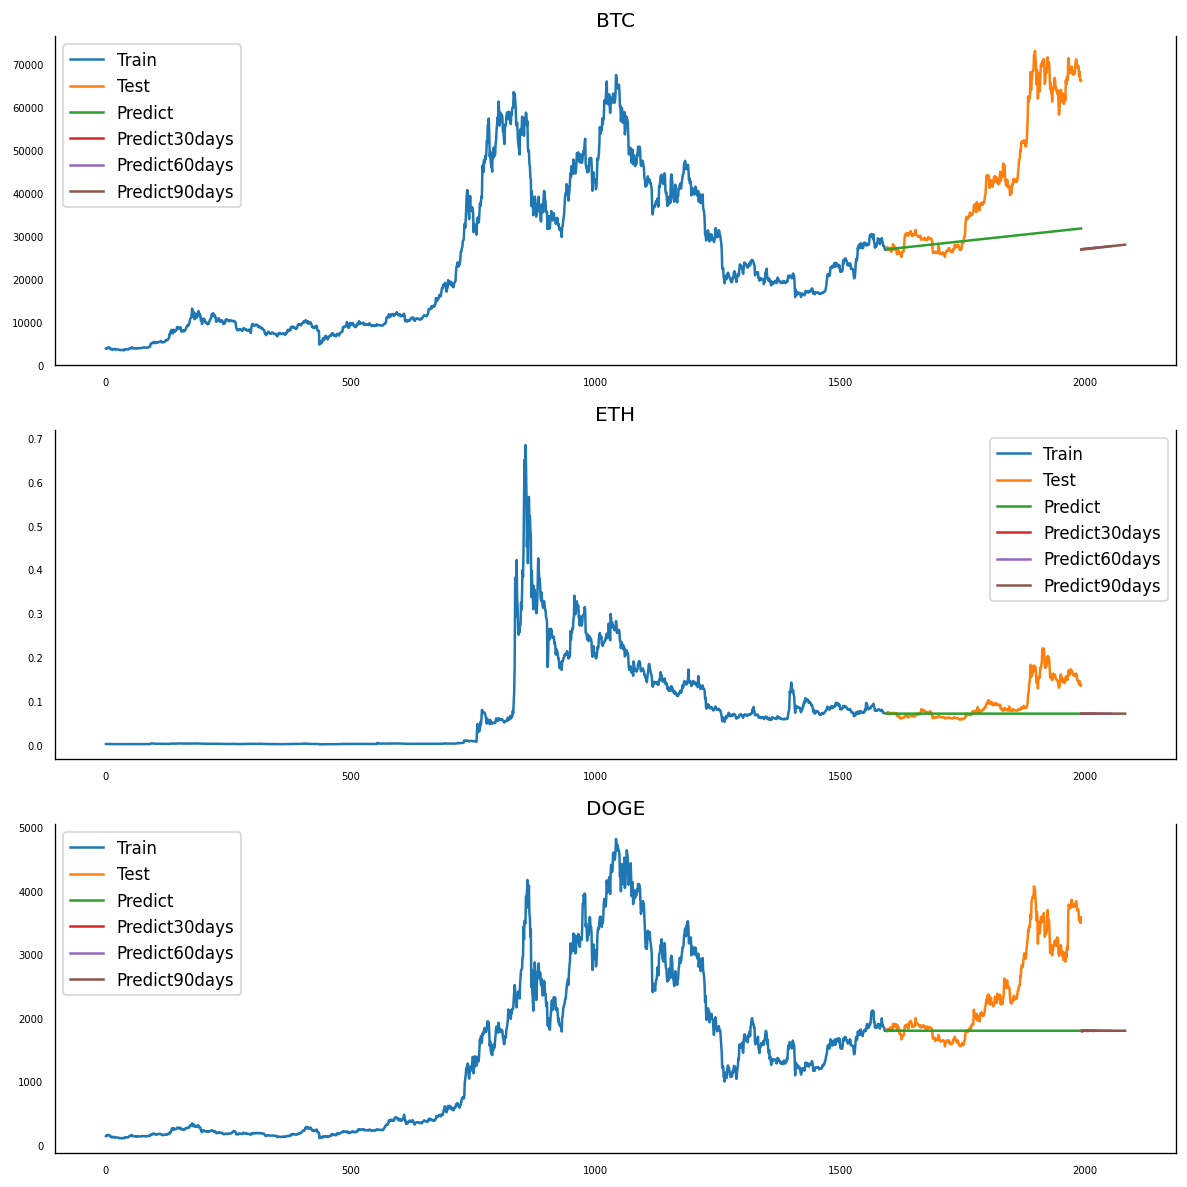

In [63]:
# 7. Vẽ hình
# plt.figure(figsize=(20, 6))
# plt.plot(train_data.index, train_data['Close'])
# plt.plot(test_data.index, test_data['Close'])
# plt.plot(test_data.index, y_pred)
# plt.plot(last_data, y_next_90_days)
# plt.legend(['Train', 'Test', 'Predictions', 'Next90Day'])
# plt.show()

fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,10))

for i, ax in enumerate(axes.flatten()):
    # data = eval(df_list[i])['Close']  # Use iloc for column access, should be fast

    # train_size = eval(f'{df_list[i]}_train_size')
    # train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    # test_size = eval(f'{df_list[i]}_test_size')
    # test_data_index = pd.RangeIndex(
    #     start=train_size, stop=train_size+test_size, step=1)
    # pred_data_index = 

    train_data = eval(f'{df_list[i]}_train_data')
    test_data = eval(f'{df_list[i]}_test_data')
    y_pred = eval(f'{df_list[i]}_y_pred')
    y_next_30_days = eval(f'{df_list[i]}_y_next_30_days')
    y_next_60_days = eval(f'{df_list[i]}_y_next_60_days')
    y_next_90_days = eval(f'{df_list[i]}_y_next_90_days')
    last_30_data = eval(f'{df_list[i]}_last_30_data')
    last_60_data = eval(f'{df_list[i]}_last_60_data')
    last_90_data = eval(f'{df_list[i]}_last_90_data')

    ax.plot(train_data.index, train_data['Close'])
    ax.plot(test_data.index, test_data['Close'])
    ax.plot(test_data.index, y_pred)
    ax.plot(last_30_data, y_next_30_days)
    ax.plot(last_60_data, y_next_60_days)
    ax.plot(last_90_data, y_next_90_days)

    ax.legend(['Train', 'Test', 'Predict', 'Predict30days', 'Predict60days', 'Predict90days'])

    # Decorations
    ax.set_title(coins[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [13]:
test_data.index

RangeIndex(start=1116, stop=1435, step=1)